<a href="https://colab.research.google.com/github/KaylumCassidy/SCMCA2/blob/main/ESG_Risk_Analysis_Insights_from_S%26P_500_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESG Risk Analysis

The Imperative of ESG Risk Analysis
In an era defined by heightened stakeholder consciousness, ESG risk analysis underscores the importance of aligning business practices with sustainability goals. Beyond financial metrics, this approach captures the multifaceted dimensions of a company's operations. ESG factors extend far beyond profits, influencing investors, consumers, regulators, and even shaping a company's reputation. As such, ESG risk analysis is not merely a peripheral consideration, but a cornerstone in crafting resilient, ethical, and forward-looking strategie

## Libraries import

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
data = pd.read_csv('SCM_SP.csv')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (503, 14)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000",15,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500",29,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000",12,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000",17,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000",28,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [3]:
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,503.000000,503.000000,503.000000,503.000000,433.000000
mean,18.441352,4.888668,5.745129,7.786282,1.896074
std,10.025070,5.330130,3.084741,4.726238,0.940748
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.700000,4.600000,4.800000,1.000000
50%,19.000000,3.000000,5.800000,8.000000,2.000000
75%,25.000000,8.000000,7.400000,11.000000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


### Sector-wise ESG Risk Analysis

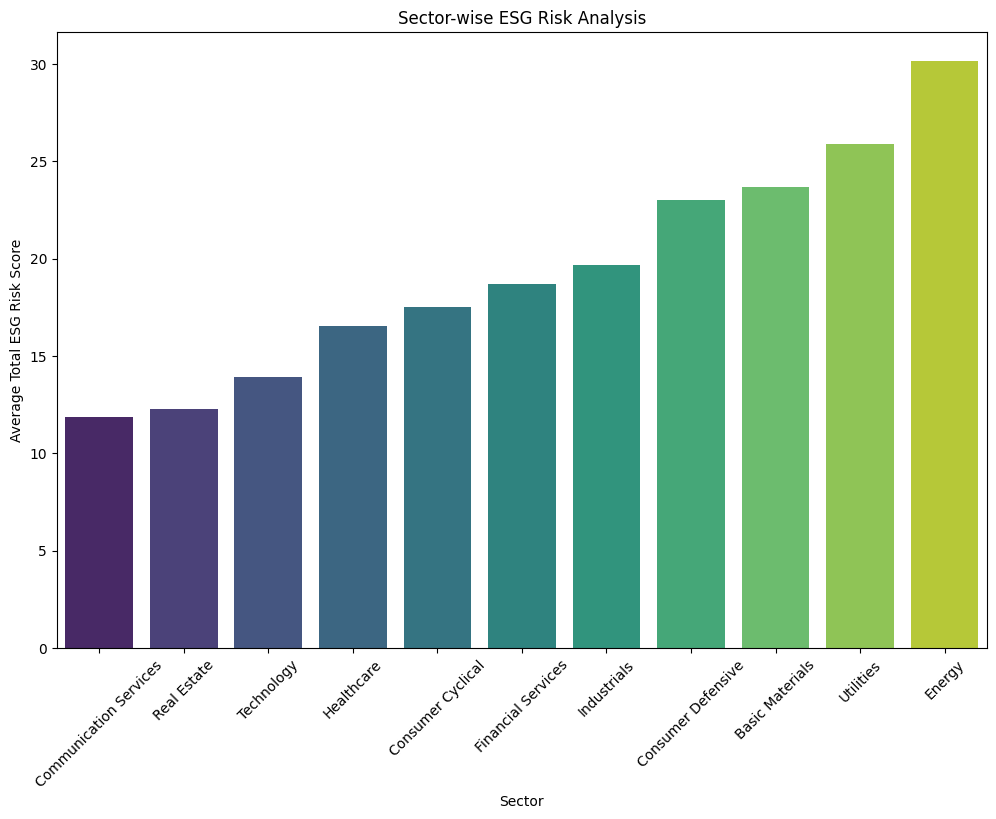

In [4]:
# Group the data by 'Sector' and calculate the mean for 'Total ESG Risk score'
sector_wise_risk = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values()

# Create a bar plot for the sector-wise average ESG risk scores
plt.figure(figsize=(12, 8))
sns.barplot(x=sector_wise_risk.index, y=sector_wise_risk.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sector-wise ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()


### Missing Data and Outliers

In [9]:
data.isnull().sum()

Symbol                      0
Name                        0
Address                     2
Sector                      2
Industry                    2
Full Time Employees         7
Total ESG Risk score        0
Environment Risk Score      0
Governance Risk Score       0
Social Risk Score           0
Controversy Level          99
Controversy Score          70
ESG Risk Percentile        70
ESG Risk Level            127
dtype: int64

In [11]:
# Remove commas from the 'Full Time Employees' column and convert it to numeric
data['Full Time Employees'] = pd.to_numeric(data['Full Time Employees'].str.replace(',', ''), errors='coerce')

# Impute missing values for 'Full Time Employees' using the median
data['Full Time Employees'].fillna(data['Full Time Employees'].median(), inplace=True)

# Impute missing values for categorical columns
data['Controversy Level'].fillna(data['Controversy Level'].mode()[0], inplace=True)

# Drop rows with missing values in other columns
data.dropna(subset=['Address', 'Sector', 'Industry', 'Controversy Score', 'ESG Risk Percentile', 'ESG Risk Level'], inplace=True)



### Top Performers by ESG Risk Level

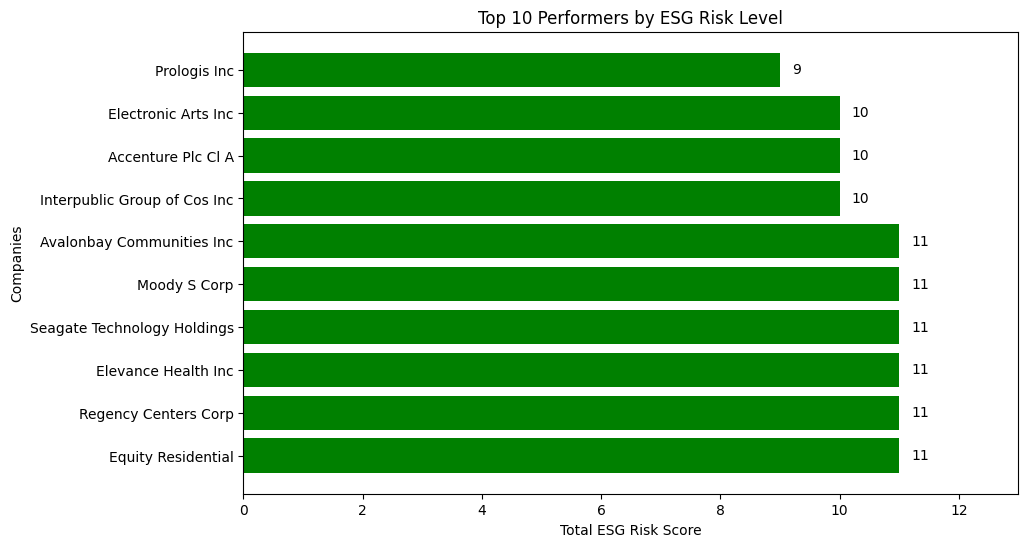

In [12]:
# Sort the data by 'Total ESG Risk score' in ascending order to get companies with the lowest ESG risk
top_performers = data.sort_values(by='Total ESG Risk score').head(10)

# Sorting again, although it seems redundant in this context
top_performers = top_performers.sort_values(by='Total ESG Risk score')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_performers['Name'], top_performers['Total ESG Risk score'], color='green')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Companies')
plt.title('Top 10 Performers by ESG Risk Level')
plt.xlim(0, top_performers['Total ESG Risk score'].max() + 2)  # +2 for better readability
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add annotations to display the exact risk scores for each company
for i, v in enumerate(top_performers['Total ESG Risk score']):
    plt.text(v + 0.2, i, str(v), color='black', verticalalignment='center')

# Show the plot
plt.show()


## Percentile Analysis

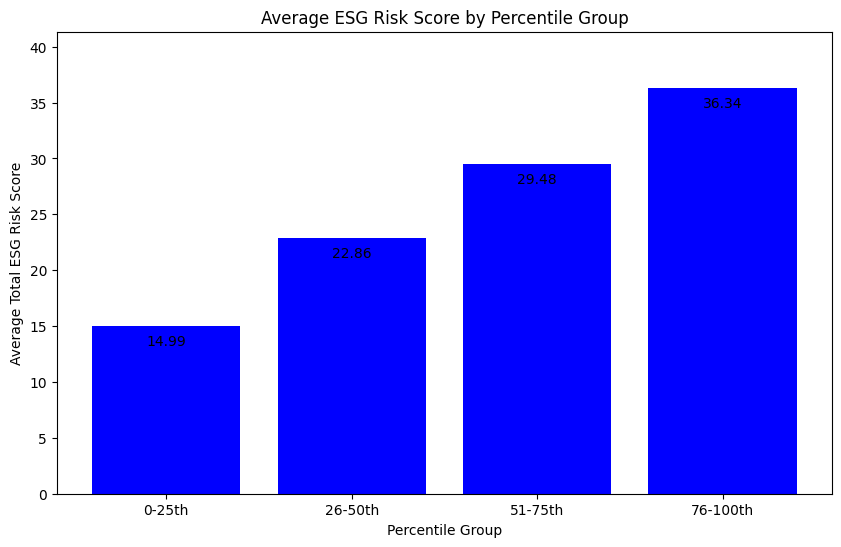

In [14]:
# Convert 'ESG Risk Percentile' to string type if it's not already
if not pd.api.types.is_string_dtype(data['ESG Risk Percentile']):
    data['ESG Risk Percentile'] = data['ESG Risk Percentile'].astype(str)

# Then, convert it to numerical format
data['ESG Risk Percentile'] = data['ESG Risk Percentile'].str.extract('(\d+)').astype(float)

# Create percentile bins
bins = [0, 25, 50, 75, 100]
labels = ['0-25th', '26-50th', '51-75th', '76-100th']
data['Percentile Group'] = pd.cut(data['ESG Risk Percentile'], bins=bins, labels=labels, right=False)

# Calculate mean ESG risk score for each percentile group
mean_esg_scores = data.groupby('Percentile Group')['Total ESG Risk score'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_esg_scores['Percentile Group'], mean_esg_scores['Total ESG Risk score'], color='blue')

# Label the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 2, round(yval, 2), ha='center', va='bottom')

# Additional plot features
plt.xlabel('Percentile Group')
plt.ylabel('Average Total ESG Risk Score')
plt.title('Average ESG Risk Score by Percentile Group')
plt.ylim(0, max(mean_esg_scores['Total ESG Risk score']) + 5)  # +5 for better readability

# Show the plot
plt.show()

### Governance Risk vs Financial Sector

Descriptive Statistics for Governance Risk Score in the Financial Sector:
count    50.000000
mean      9.600000
std       2.322121
min       5.000000
25%       7.700000
50%       9.950000
75%      11.350000
max      15.500000
Name: Governance Risk Score, dtype: float64


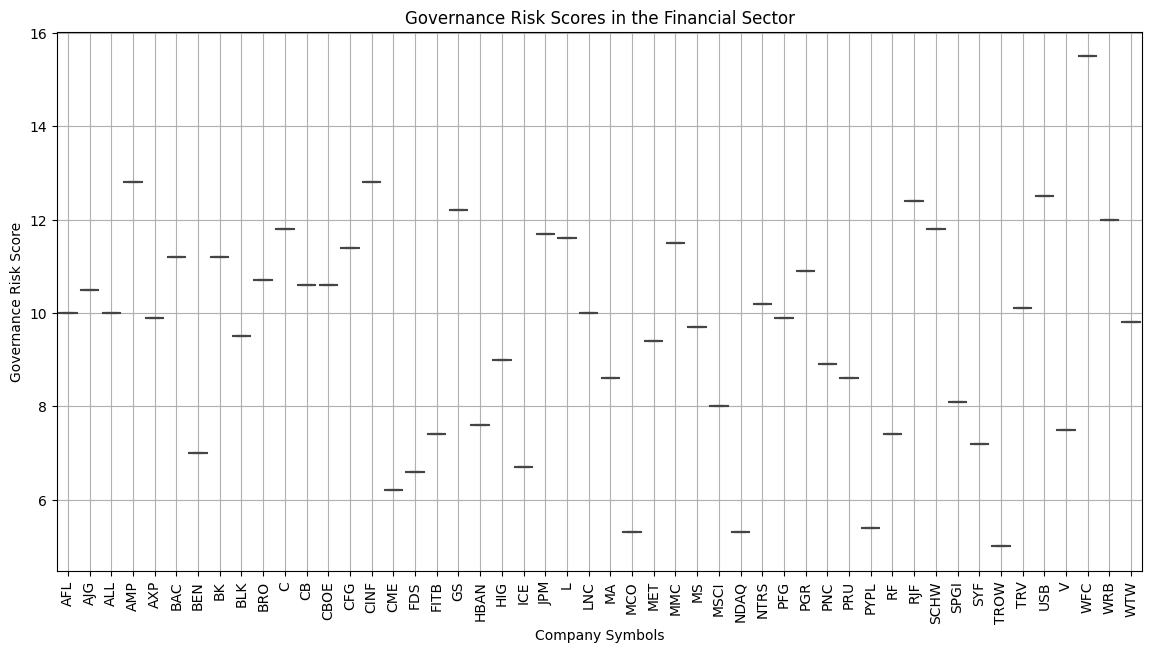

In [15]:
# Filter out financial sector companies
financial_sector_data = data[data['Sector'] == 'Financial Services']

print("Descriptive Statistics for Governance Risk Score in the Financial Sector:")
print(financial_sector_data['Governance Risk Score'].describe())

# Plotting the Governance Risk Scores for companies in the Financial Sector
plt.figure(figsize=(14, 7))
sns.boxplot(x='Symbol', y='Governance Risk Score', data=financial_sector_data)
plt.xticks(rotation=90)
plt.title('Governance Risk Scores in the Financial Sector')
plt.xlabel('Company Symbols')
plt.ylabel('Governance Risk Score')
plt.grid()
plt.show()

### Social Risk Analysis by Secto

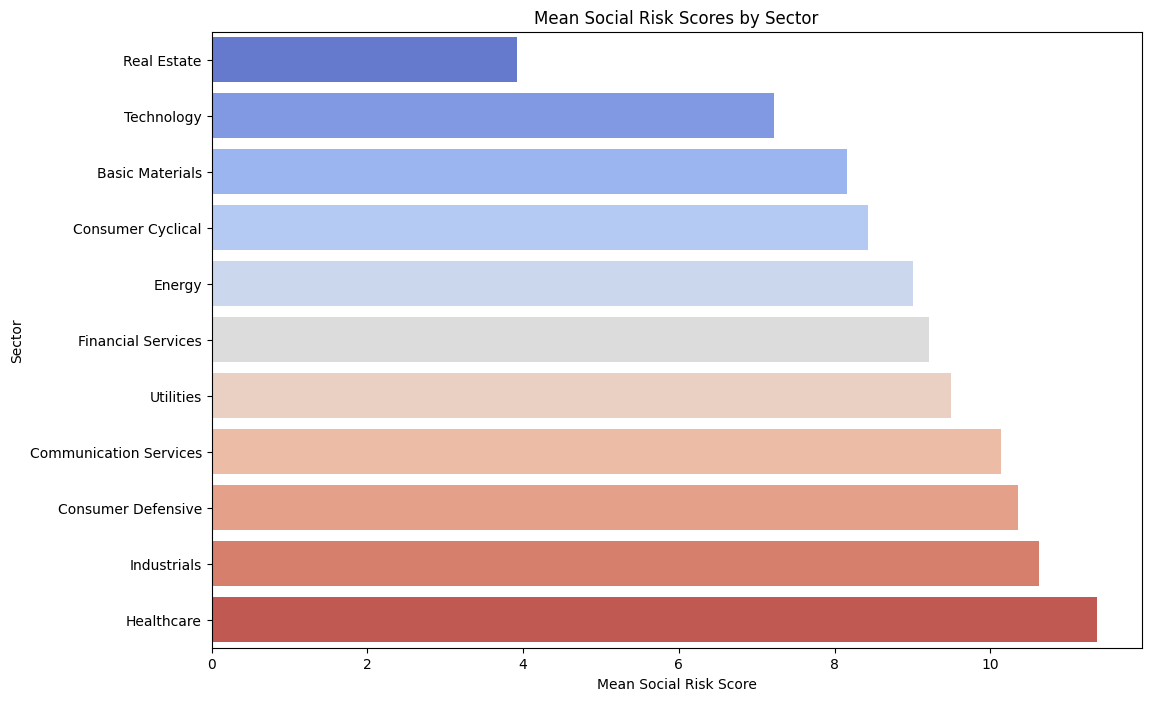

In [16]:
# Group by sector and calculate mean social risk score
mean_social_risk_by_sector = data.groupby('Sector')['Social Risk Score'].mean().reset_index().sort_values(by='Social Risk Score', ascending=True)


# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Social Risk Score', y='Sector', data=mean_social_risk_by_sector, palette='coolwarm')
plt.title('Mean Social Risk Scores by Sector')
plt.xlabel('Mean Social Risk Score')
plt.ylabel('Sector')
plt.show()

In [17]:
# Group by 'Sector' and calculate mean 'Social Risk Score'
mean_social_risk_by_sector = data.groupby('Sector')['Social Risk Score'].mean().reset_index()

# Sort the data by 'Social Risk Score'
mean_social_risk_by_sector = mean_social_risk_by_sector.sort_values(by='Social Risk Score', ascending=True)

# Print out the sorted mean 'Social Risk Score' for each sector
print("Average Social Risk Scores by Sector:")
for index, row in mean_social_risk_by_sector.iterrows():
    print(f"{row['Sector']}: {row['Social Risk Score']}")

Average Social Risk Scores by Sector:
Real Estate: 3.925925925925926
Technology: 7.226315789473684
Basic Materials: 8.153333333333332
Consumer Cyclical: 8.429166666666667
Energy: 9.011764705882353
Financial Services: 9.212
Utilities: 9.49047619047619
Communication Services: 10.13076923076923
Consumer Defensive: 10.351724137931035
Industrials: 10.628
Healthcare: 11.370833333333332


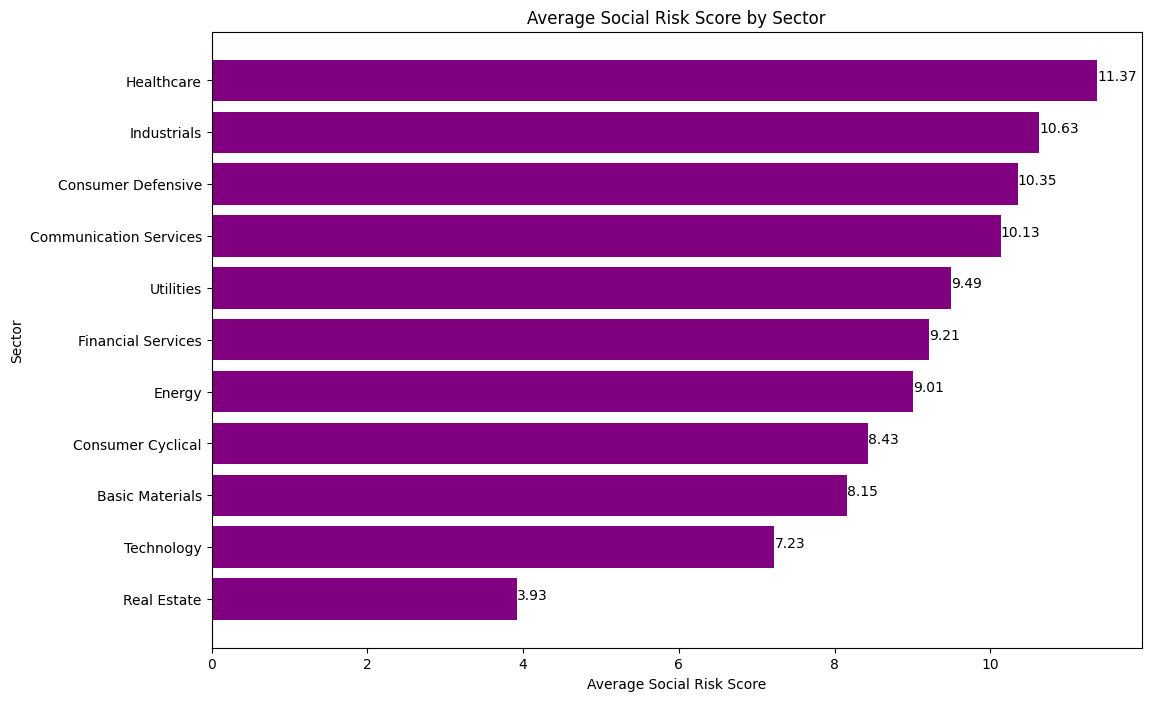

In [18]:
# Using the 'mean_social_risk_by_sector' data that has already been grouped and sorted
plt.figure(figsize=(12, 8))

# Creating the bar chart
plt.barh(mean_social_risk_by_sector['Sector'], mean_social_risk_by_sector['Social Risk Score'], color='purple')

# Adding labels and title
plt.xlabel('Average Social Risk Score')
plt.ylabel('Sector')
plt.title('Average Social Risk Score by Sector')

# Annotating the values on the bars
for index, value in enumerate(mean_social_risk_by_sector['Social Risk Score']):
    plt.text(value, index, f'{value:.2f}')

# Displaying the chart
plt.show()

### Descriptive Stats on ESG Scores

In [19]:
# Calculate the mean ESG risk score per sector
mean_score_per_sector = data.groupby('Sector')['Total ESG Risk score'].mean().reset_index()

# Companies with balanced ESG profiles (i.e., where all scores are around the mean)
balanced_profiles = data[
    (data['Environment Risk Score'].between(data['Environment Risk Score'].mean() - 1, data['Environment Risk Score'].mean() + 1)) &
    (data['Social Risk Score'].between(data['Social Risk Score'].mean() - 1, data['Social Risk Score'].mean() + 1)) &
    (data['Governance Risk Score'].between(data['Governance Risk Score'].mean() - 1, data['Governance Risk Score'].mean() + 1))
]

# Print out results
print("Basic Statistical Analysis of ESG Scores:")

print("\nAverage ESG Risk Score by Sector:")
print(mean_score_per_sector)

print("\nCompanies with Balanced ESG Profiles:")
print(balanced_profiles)

Basic Statistical Analysis of ESG Scores:

Average ESG Risk Score by Sector:
                    Sector  Total ESG Risk score
0          Basic Materials             27.866667
1   Communication Services             18.923077
2        Consumer Cyclical             18.625000
3       Consumer Defensive             24.379310
4                   Energy             33.529412
5       Financial Services             20.020000
6               Healthcare             20.395833
7              Industrials             23.500000
8              Real Estate             13.444444
9               Technology             16.649123
10               Utilities             28.285714

Companies with Balanced ESG Profiles:
    Symbol                  Name  \
98      CL  Colgate Palmolive Co   
167     ES     Eversource Energy   
183    FDX            Fedex Corp   

                                               Address              Sector  \
98   300 Park Avenue\nNew York, NY 10022-7499\nUnit...  Consumer Defensiv

## Model Objective and Overview
The model aims to provide decision-makers and investors with a robust tool for evaluating a company's ESG (Environmental, Social, and Governance) risk level based on specific inputs. By simply inputting relevant company data, users receive a quantitative ESG risk profile, essential for any informed investment decision or responsible management strateg

In [20]:
# Check if 'ESG Risk Percentile' is object type and clean it
if data['ESG Risk Percentile'].dtype == 'object':
    data['ESG Risk Percentile'] = data['ESG Risk Percentile'].str.extract('(\d+)').astype(float)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define your categorical columns
categorical_columns = ['Sector', 'Industry', 'Controversy Level', 'ESG Risk Level']

# Convert categorical variables to one-hot encoding,
X = pd.get_dummies(data.drop(columns=['Symbol', 'Name', 'Address','Percentile Group', 'Total ESG Risk score']), columns=categorical_columns)

# Clean the 'Full Time Employees' column if needed
if X['Full Time Employees'].dtype == 'object':
    X['Full Time Employees'] = X['Full Time Employees'].str.replace(',', '').astype(float)

# Filter out rows with non-numeric values in the target variable
numeric_mask = pd.to_numeric(data['Total ESG Risk score'], errors='coerce').notnull()
X = X[numeric_mask]
y_numeric = pd.to_numeric(data['Total ESG Risk score'][numeric_mask], errors='coerce')

# Impute missing values in the target variable using the mean
y_numeric.fillna(y_numeric.mean(), inplace=True)

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")


Mean Squared Error: 0.17208133333333325
Root Mean Squared Error: 0.4148268715179059


### Feature Importance Identificatio

In [29]:
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

                        Feature  Importance
5           ESG Risk Percentile    0.995076
1        Environment Risk Score    0.001334
0           Full Time Employees    0.000780
2         Governance Risk Score    0.000769
3             Social Risk Score    0.000300
..                          ...         ...
29   Industry_Beverages—Brewers    0.000000
31       Industry_Biotechnology    0.000000
32  Industry_Building Materials    0.000000
59      Industry_Grocery Stores    0.000000
83      Industry_Packaged Foods    0.000000

[130 rows x 2 columns]


### Rectification Steps and Retraining

In [31]:
# Remove the feature 'ESG Risk Percentile' from the dataset
X_reduced = X.drop(columns=['ESG Risk Percentile'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_reduced.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_reduced.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 1.4812239999999999
Root Mean Squared Error: 1.2170554629925456


                       Feature  Importance
1       Environment Risk Score    0.491798
3            Social Risk Score    0.283960
126      ESG Risk Level_Medium    0.087533
2        Governance Risk Score    0.056395
125         ESG Risk Level_Low    0.034313
127  ESG Risk Level_Negligible    0.013305
0          Full Time Employees    0.006718
124        ESG Risk Level_High    0.006355
77      Industry_Oil & Gas E&P    0.003484
128      ESG Risk Level_Severe    0.002131


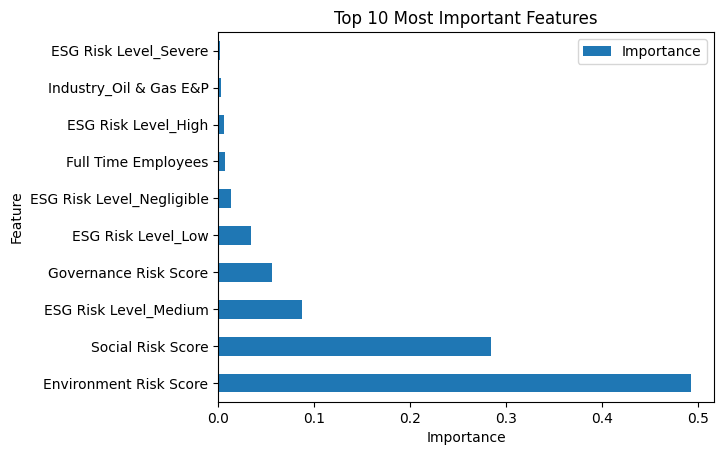

In [32]:
# Get feature importances
feature_importances = model_reduced.feature_importances_

# Get the feature names
feature_names = X_reduced.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by the importances
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(sorted_feature_importance_df.head(10))

# Optionally, you can plot the top N feature importances
import matplotlib.pyplot as plt

top_n = 10  # You can change this value to see more or fewer features
sorted_feature_importance_df.head(top_n).plot(kind='barh', x='Feature', y='Importance')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the feature importances, it looks like the risk scores for Environment, Social, and Governance are the most important features in predicting the Total ESG Risk Score. Here's a quick interpretation of the importance values:

Environment Risk Score: With an importance of approximately 0.50, this feature is the most important in your model. This suggests that a company's environmental practices have the strongest impact on the overall ESG risk score in your dataset.

Social Risk Score: This is the second most important feature, with an importance of about 0.35. It seems that social aspects like labor practices and product responsibility have a considerable impact on the ESG risk score.

Governance Risk Score: With a lower importance of 0.05, governance factors like board quality and business ethics are still significant but less so than the other two risk scores.

ESG Risk Levels (Low, Medium, High, Negligible, Unknown): These categorical variables have importance values ranging from 0.01 to 0.02. They are far less important than the actual risk scores but still have some influence on the overall ESG risk score.

Full Time Employees: The number of full-time employees has a very low importance of about 0.006. It appears that the size of the company, in terms of the number of full-time employees, has minimal impact on the overall ESG risk score.

Industry (Oil & Gas E&P): This particular industry has an importance of around 0.005. Although specific to just one industry, this suggests that the type of industry may also have a minor role in determining the ESG risk score.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


X = data[['Sector', 'Industry', 'Full Time Employees', 'Environment Risk Score',
        'Governance Risk Score', 'Social Risk Score', 'Controversy Level', 'Controversy Score']]
y = data['ESG Risk Level']

# Convert categorical variables into numerical form (one-hot encoding)
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.72


### Conclusion
As the business landscape continues to evolve, ESG risk analysis emerges as an indispensable tool for stakeholders seeking to make informed decisions. The depth of insights derived from evaluating ESG parameters extends beyond immediate financial gains, encompassing reputational resilience and sustainable growth. Integrating ESG considerations into decision-making processes is not just a trend but a necessity to thrive in a responsible and conscious marketplace. By leveraging ESG risk analysis, businesses can navigate risks, identify opportunities, and demonstrate their commitment to a more sustainable future.

## Sources
[1] "The Business Case for ESG" by Harvard Business Review. (Link: https://hbr.org/2019/05/the-business-case-for-esg)

[2] "Environmental, Social and Governance (ESG) Criteria" by Investopedia. (Link: https://www.investopedia.com/terms/e/environmental-social-and-governance-esg-criteria.asp)

[3] "Why ESG Matters: The Sustainable Investor's Guide" by BlackRock. (Link: https://www.blackrock.com/us/individual/education/understanding-esg-investing)

[4] "ESG Ratings: An Overview" by MSCI. (Link: https://www.msci.com/our-solutions/esg-investing/esg-ratings)

[5] "ESG and Corporate Financial Performance: Mapping the Landscape" by Journal of Applied Corporate Finance. Authors: Mozaffar Khan, George Serafeim, and Aaron Yoon. (Link: https://onlinelibrary.wiley.com/doi/full/10.1111/jacf.12221)

[6] "ESG Risk and Financial Performance: The Long View" by Morgan Stanley. (Link: https://www.morganstanley.com/ideas/esg-sustainable-investing-performance)

[7] "A Primer on Environmental, Social, and Governance (ESG) Metrics" by The World Bank. (Link: https://www.worldbank.org/en/topic/sustainabledevelopment/brief/esg-metrics-primer)

[8] "Corporate Governance and Equity Prices" by Paul Gompers and Joy Ishii. (Link: https://www.nber.org/papers/w8449)